In [24]:

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings


warnings.filterwarnings('ignore')

In [25]:
base_dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

In [26]:
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [27]:
base_dados.shape

(1034, 9)

In [28]:
base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [29]:
base_dados.dropna(inplace=True)

In [30]:
base_dados.isnull().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

In [31]:
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


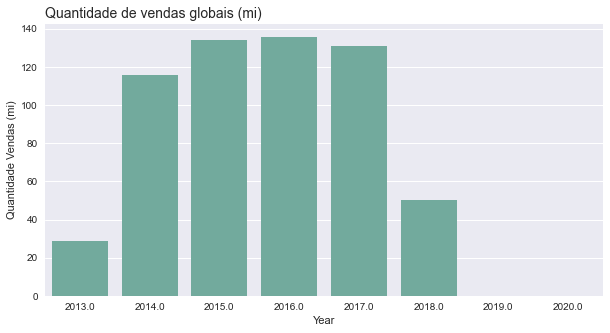

In [32]:
plt.figure(figsize=(10,5))

plt.title('Quantidade de vendas globais (mi)', loc='left', fontsize=14)

sns.barplot( data = base_dados, x = 'Year', y = 'Global', ci = None, color='#69b3a2', estimator = sum)

plt.ylabel('Quantidade Vendas (mi)');

In [33]:
base_dados = base_dados.loc[(base_dados['Year'] !=2019) & (base_dados['Year'] !=2020)]


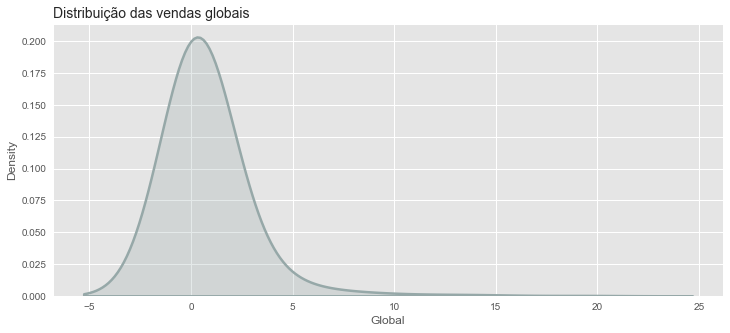

In [34]:
plt.figure(figsize=(12,5))

plt.style.use('ggplot')

plt.title('Distribuição das vendas globais', loc='left', fontsize=14)

sns.kdeplot( base_dados['Global'], shade= True, bw=1, color= '#96a8a8', linewidth=2.5);

In [35]:
Analise = base_dados.groupby( by=['Year']).sum().reset_index()

<AxesSubplot:xlabel='Year', ylabel='Global'>

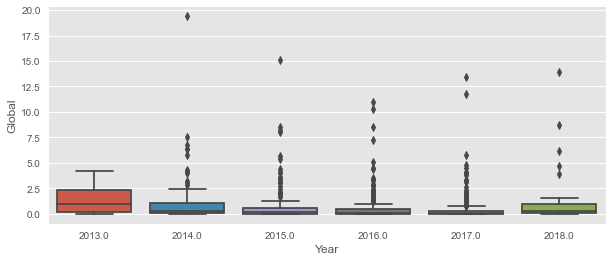

In [36]:
plt.figure(figsize=(10,4))

sns.boxplot (data= base_dados, x='Year', y='Global')

No conjunto de dados é possivél notar uma grande presença de outliers, possivelmente alguns jogos se destacaram e tiveram uma quantidade elevada de unidades

In [37]:
base_dados.loc[base_dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [38]:
#Analisando (%) de contribuição de cada continente
America = [America / Total * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip(Analise['Europe'], Analise['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip(Analise['Japan'], Analise['Global'])]
Mundo = [Mundo / Total * 100 for Mundo, Total in zip(Analise['Rest of World'], Analise['Global'])]


America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

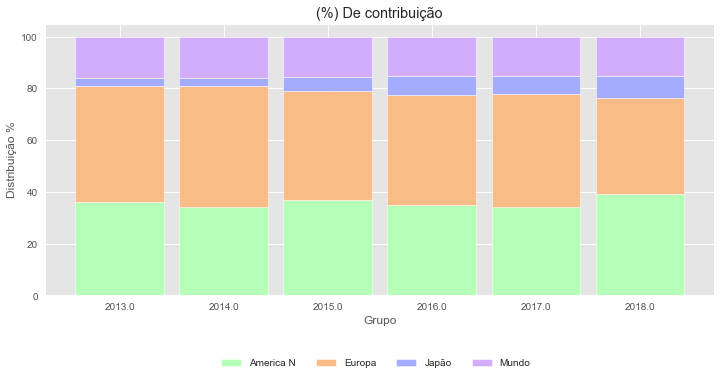

In [39]:
plt.figure(figsize=(12,5))

Largura_barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

plt.title('(%) De contribuição');

#Plot America
plt.bar(Grupos, America, width= Largura_barra, color = '#b5ffb9', edgecolor ='white')

#Plot Europa
plt.bar(Grupos, Europa, bottom=America, width= Largura_barra, color = '#f9bc86', edgecolor ='white')

#Plot Japao
plt.bar( Grupos, Japao, bottom = [ A + B for A, B in zip(America, Europa) ], width= Largura_barra, color = '#a3acff', edgecolor ='white')

#Plot Mundo
plt.bar( Grupos, Mundo, bottom = [ A + B + C for A, B , C in zip(America, Europa, Japao) ], width= Largura_barra, color = '#d3acfe', edgecolor ='white')

plt.title('(%) De contribuição')

plt.xticks( Grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.25, -0.2), ncol=4)

In [40]:
#Gerando um id para cada string e criando uma coluna
funcao_label = LabelEncoder()

funcao_label.fit_transform(base_dados['Publisher'])

array([107,   8, 107,   8,  40,  41, 113, 113,   8,  19,  40,  41,   8,
        41, 112, 112,  40, 113, 113,   8, 112,  86, 117,   8,  25,  23,
        41, 140, 140, 140,   8, 140,   8, 144, 140, 140,   1, 140,  41,
       113, 140,   1, 145,  40,  19, 140,   1,  25,  40,  40, 145, 140,
       140, 112,  70, 112, 112,  19,   0,  23, 140,  41,  40,   1, 144,
        86, 113, 112, 113,  41,  61,  40,  41,   8,  41, 113,  41, 117,
       112,  19, 145, 117,   3, 117,  19, 145, 112, 112,  19, 140, 117,
       140,  41, 145, 117,  86,  35, 112,  19, 113,  86,   1, 117,  86,
       140,  41,  86, 140,  41,  25,  19,   1, 145,  40, 113, 122,   0,
        18,   0,   8,  70, 145, 113, 117,  86, 145, 145,   1, 113, 145,
        19, 145,  41, 117, 108, 113,  19,  19, 117, 129, 112, 140, 145,
         0, 145,  40,  40, 112, 145, 117,  86, 112,  55, 145,  84,   0,
       117, 113,  37,  45, 140,  70, 119, 117, 140, 117,   8,  27, 117,
        70, 145,  70,  37,  70,   3, 112, 113, 117, 145,  25,  8

In [41]:
base_dados['Publisher_id'] = funcao_label.fit_transform(base_dados['Publisher'])
base_dados['Genre_id'] = funcao_label.fit_transform(base_dados['Genre'])
base_dados['Game_id'] = funcao_label.fit_transform(base_dados['Game'])

base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Publisher_id,Genre_id,Game_id
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [42]:
#Definindo paleta de cores 
Paleta_Cores = sns.color_palette('husl',8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

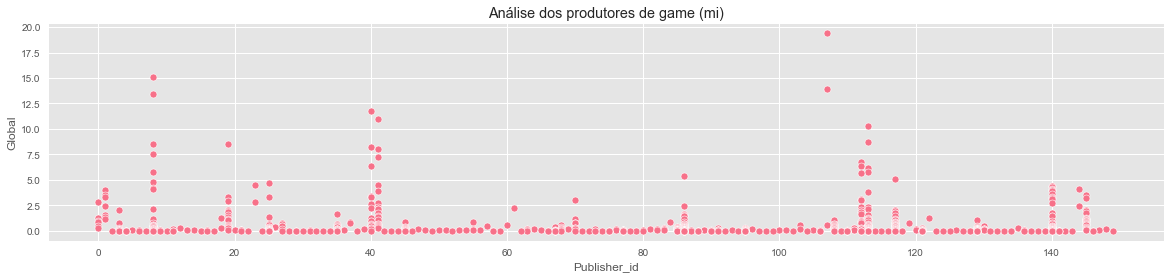

In [43]:
plt.figure(figsize=(20,4))

plt.title('Análise dos produtores de game (mi)')

sns.scatterplot(data=base_dados, x='Publisher_id' ,y='Global', color=Paleta_Cores[0]);


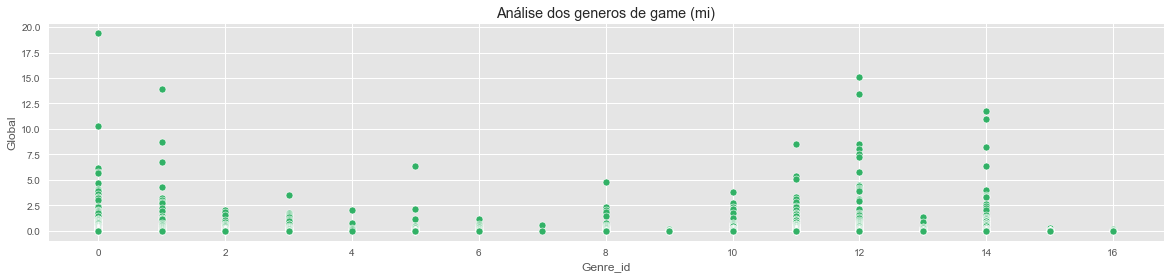

In [44]:
plt.figure(figsize=(20,4))

plt.title('Análise dos generos de game (mi)')

sns.scatterplot(data=base_dados, x='Genre_id' ,y='Global', color=Paleta_Cores[3]);


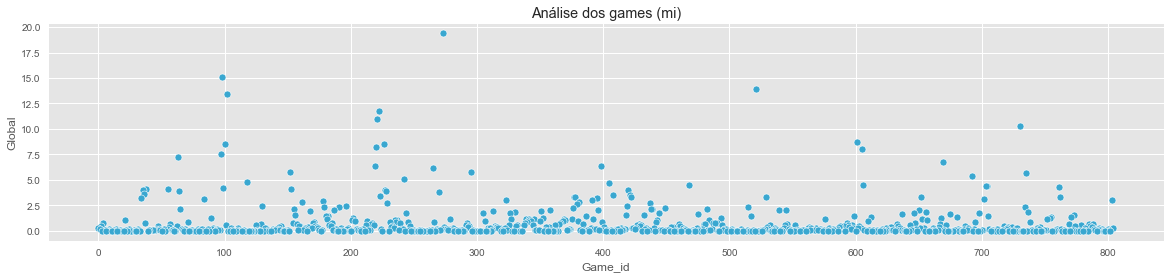

In [45]:
plt.figure(figsize=(20,4))

plt.title('Análise dos games (mi)')

sns.scatterplot(data=base_dados, x='Game_id' ,y='Global', color=Paleta_Cores[5]);


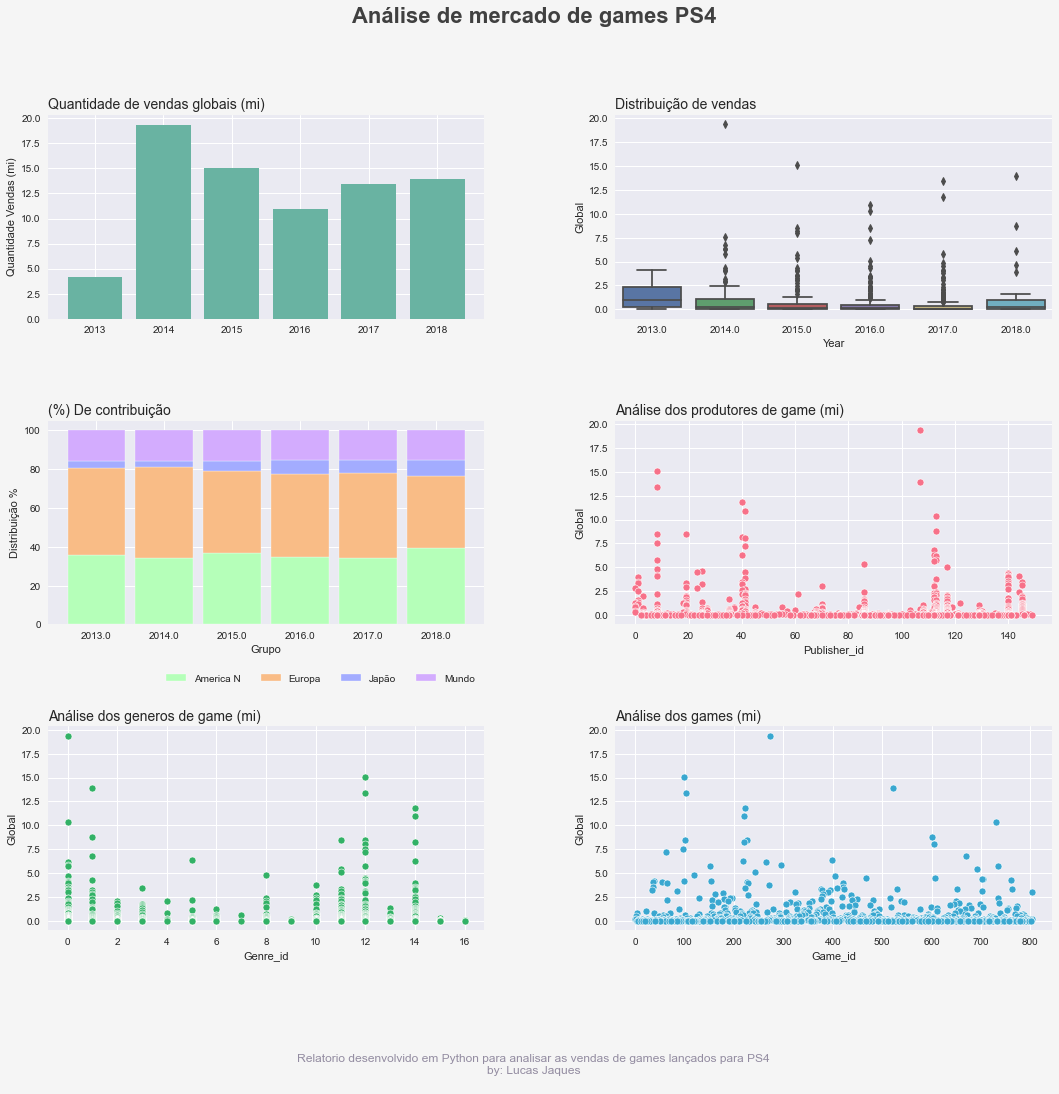

In [46]:
#Criando report 

#Tamanho Grid
fig, ax = plt.subplots( figsize=(18, 15) )

#Cor de fundo
Cor_fundo = '#f5f5f5'
ax.set_facecolor(Cor_fundo)
fig.set_facecolor(Cor_fundo)

#Estilo dos gráficos
plt.style.use('seaborn')

#Titulo do grid
plt.suptitle('Análise de mercado de games PS4', fontsize=22, color='#404040', fontweight=600)

#Rodapé
Rodape=''' 
Relatorio desenvolvido em Python para analisar as vendas de games lançados para PS4
by: Lucas Jaques
'''
fig.text (0.5, -0.02, Rodape, ha='center', va='bottom', size=12, color='#938ca1')

#Parametros para o grid
Colunas = 2
Linhas = 3

#Acessando gráfico 1
plt.subplot(Linhas, Colunas, 1)

plt.title('Quantidade de vendas globais (mi)', loc='left', fontsize=14)

plt.bar( base_dados['Year'], base_dados['Global'], color='#69b3a2')

plt.ylabel('Quantidade Vendas (mi)');


#Acessando gráfico 2

plt.subplot(Linhas, Colunas, 2)

plt.title('Distribuição de vendas', loc='left', fontsize=14)

sns.boxplot (data= base_dados, x='Year', y='Global')

#Acessando gráfico 3
plt.subplot(Linhas, Colunas, 3)


Largura_barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]


#Plot America
plt.bar(Grupos, America, width= Largura_barra, color = '#b5ffb9', edgecolor ='white')

#Plot Europa
plt.bar(Grupos, Europa, bottom=America, width= Largura_barra, color = '#f9bc86', edgecolor ='white')

#Plot Japao
plt.bar( Grupos, Japao, bottom = [ A + B for A, B in zip(America, Europa) ], width= Largura_barra, color = '#a3acff', edgecolor ='white')

#Plot Mundo
plt.bar( Grupos, Mundo, bottom = [ A + B + C for A, B , C in zip(America, Europa, Japao) ], width= Largura_barra, color = '#d3acfe', edgecolor ='white')

plt.title('(%) De contribuição', loc='left', fontsize=14)

plt.xticks( Grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.25, -0.2), ncol=4)

#Acessando gráfico 4
plt.subplot(Linhas, Colunas, 4)


plt.title('Análise dos produtores de game (mi)', loc='left', fontsize=14)

sns.scatterplot(data=base_dados, x='Publisher_id' ,y='Global', color=Paleta_Cores[0]);


#Acessando gráfico 5
plt.subplot(Linhas, Colunas, 5)



plt.title('Análise dos generos de game (mi)', loc='left', fontsize=14)

sns.scatterplot(data=base_dados, x='Genre_id' ,y='Global', color=Paleta_Cores[3]);

#Acessando gráfico 6
plt.subplot(Linhas, Colunas, 6)


plt.title('Análise dos games (mi)', loc='left', fontsize=14)

sns.scatterplot(data=base_dados, x='Game_id' ,y='Global', color=Paleta_Cores[5]);



#Ajustar Graficos para não sobreposição
plt.subplots_adjust(hspace = 0.50, wspace = 0.30)